# 竞赛总结

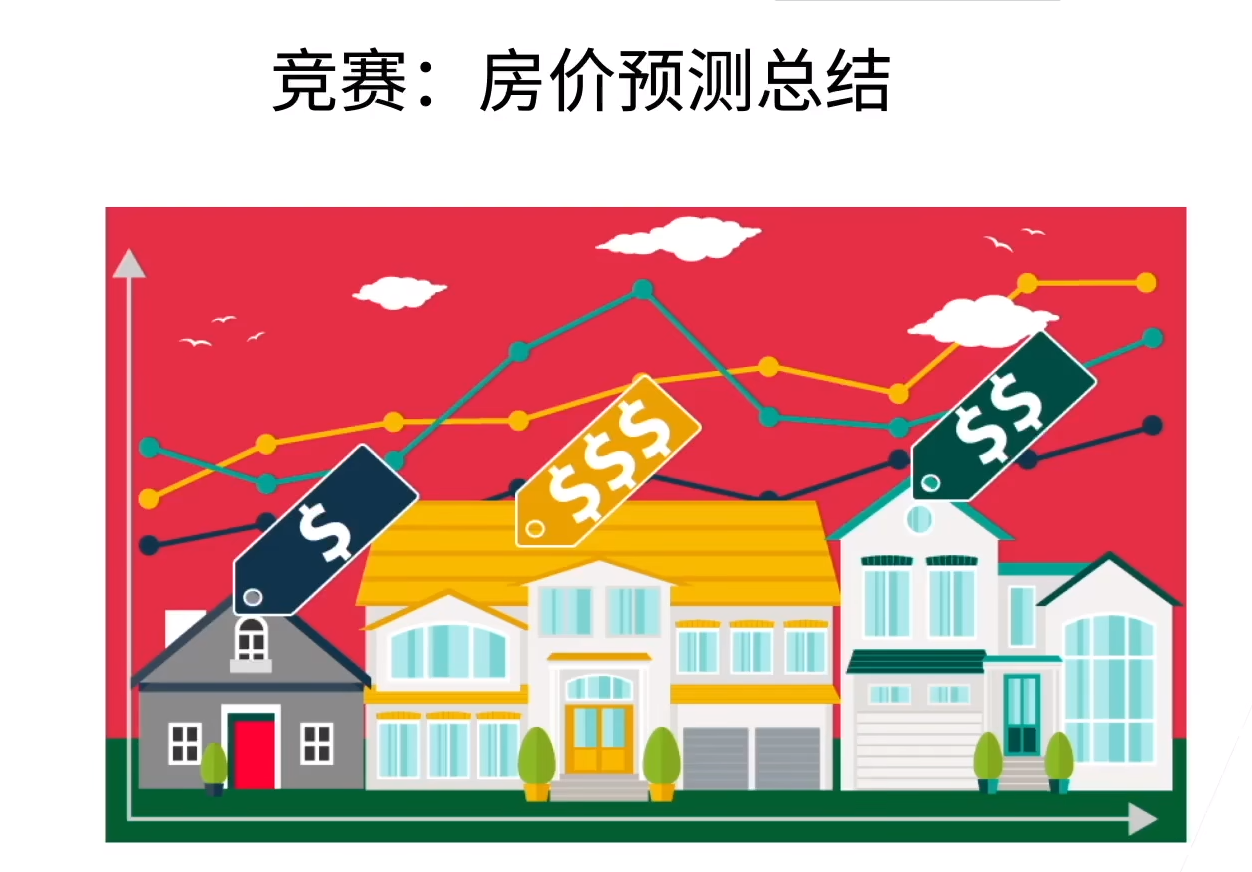


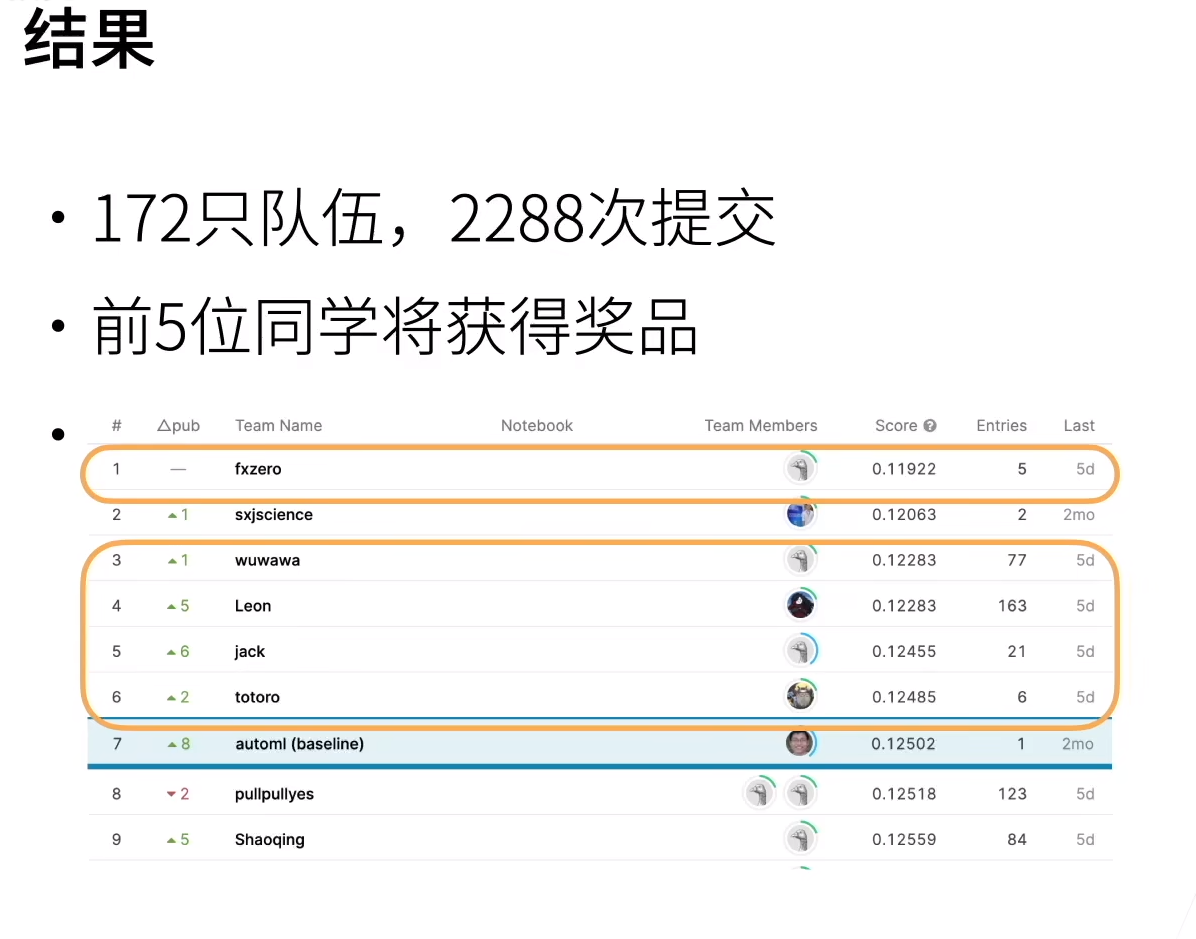

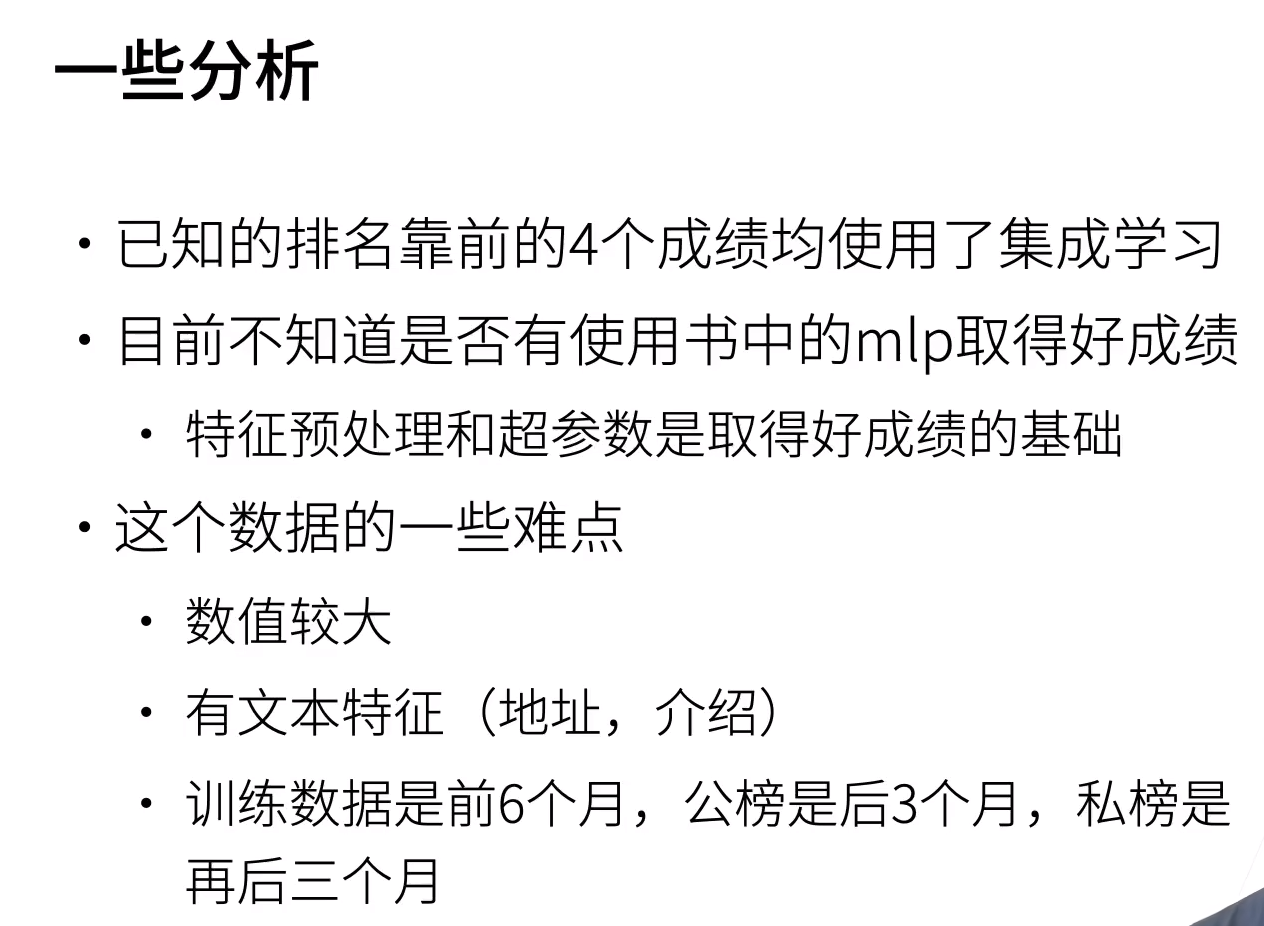

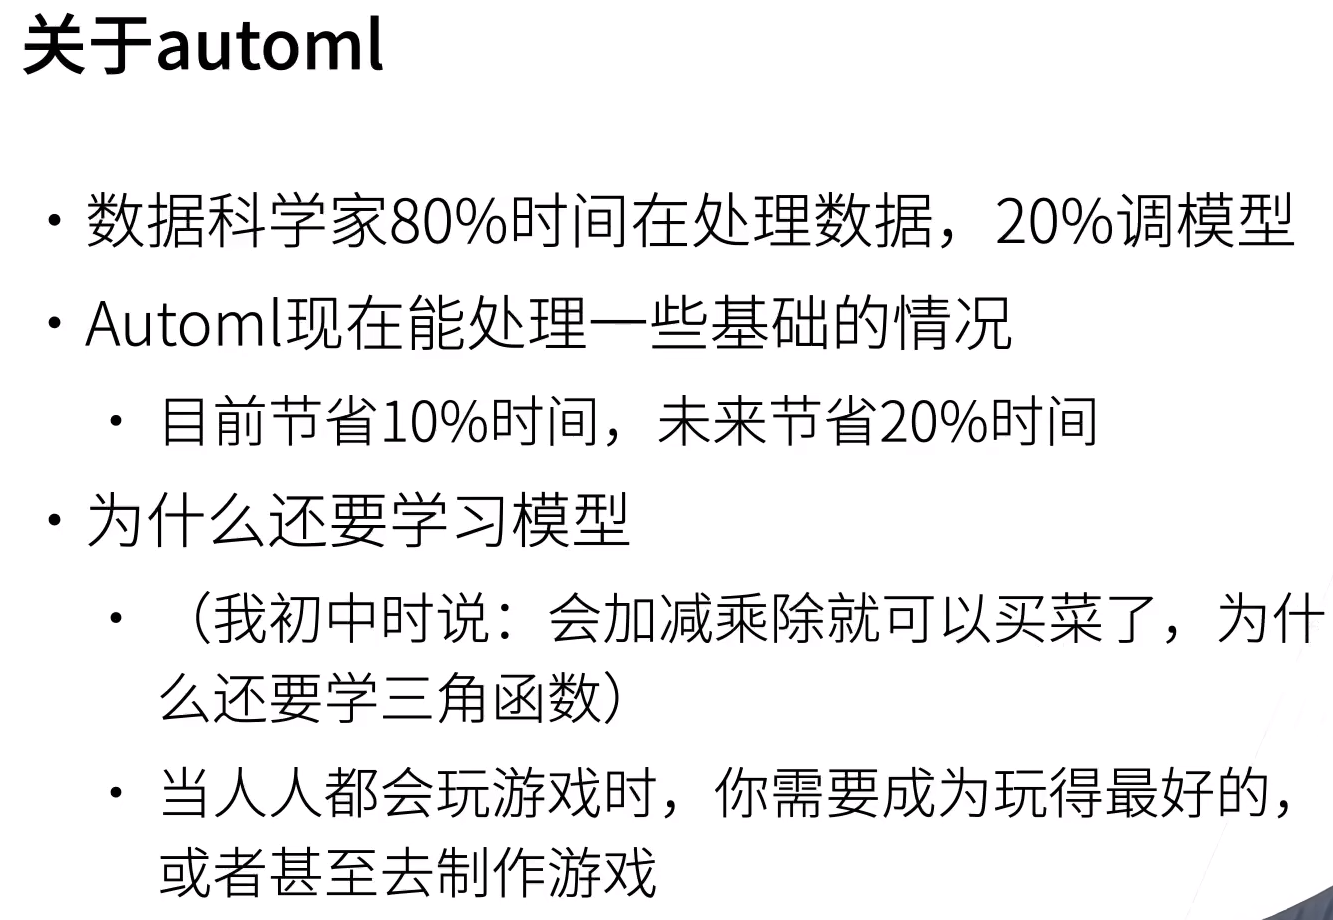

# autogluon测试

In [7]:
# First install package from terminal:
# pip install -U pip
# pip install -U setuptools wheel
# pip install autogluon  # autogluon==0.8.2

from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
predictor = TabularPredictor(label='class').fit(train_data, time_limit=120)  # Fit models for 120s
leaderboard = predictor.leaderboard(test_data)

/root/anaconda3/envs/torch_learn/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20230901_092244/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230901_092244/"
AutoGluon Version:  0.6.2
Python Version:     3.7.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #207-Ubuntu SMP Thu Oct 27 21:24:58 UTC 2022
Train Data Rows:    39073
Train Data Columns: 14
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' <=50K', ' >50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (Yo

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               XGBoost    0.877162     0.8872        0.146812       0.047675   2.800993                 0.146812                0.047675           2.800993            1       True         11
1   WeightedEnsemble_L2    0.876344     0.8912        0.905316       0.447582  48.668665                 0.014776                0.003735           1.130091            2       True         13
2              CatBoost    0.874808     0.8828        0.041319       0.019518   7.424444                 0.041319                0.019518           7.424444            1       True          7
3         LightGBMLarge    0.873784     0.8856        0.239768       0.073685  10.034647                 0.239768                0.073685          10.034647            1       True         12
4              LightGBM    0.873477     

In [6]:
conda list

# packages in environment at /root/anaconda3/envs/torch_learn:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
_openmp_mutex             5.1                       1_gnu    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
anyio                     3.7.1                    pypi_0    pypi
appdirs                   1.4.4                    pypi_0    pypi
argon2-cffi               21.3.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
attrs                     23.1.0                   pypi_0    pypi
backcall                  0.2.0                    pypi_0    pypi
beautifulsoup4            4.12.2                   pypi_0    pypi
blas                      1.0                         mkl    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
bleach                    6.0.0                    pypi

# 使用autogluon预测房价

In [19]:
# 导入需要的库
import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

# 加载数据
train_data = TabularDataset('../kaggle/California_House_Prices/train.csv')
# print(train_data)

# 记录Id列和Sold Price列
id, lable = 'Id','Sold Price'

# 数据预处理
large_val_cols = ['Lot', 'Total interior livable area','Tax assessed value', 'Annual tax amount','Listed Price','Last Sold Price']
for c in large_val_cols + [lable]:
    train_data[c] = np.log(train_data[c] + 1)
    
# 训练
predictor = TabularPredictor(label = lable).fit(train_data.drop(columns = [id])) 

# 预测
test_data = TabularDataset('../kaggle/California_House_Prices/test.csv')
preds = predictor.leaderboard(test_data.drop(columns = [id]))
submission = pd.Dataframe({id:test_data[Id], lable:preds})
submission.to_csv('submission.csv', index = False)

Loaded data from: ../kaggle/California_House_Prices/train.csv | Columns = 41 / 41 | Rows = 47439 -> 47439
No path specified. Models will be saved in: "AutogluonModels/ag-20230901_101626/"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230901_101626/"
AutoGluon Version:  0.6.2
Python Version:     3.7.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #207-Ubuntu SMP Thu Oct 27 21:24:58 UTC 2022
Train Data Rows:    47439
Train Data Columns: 39
Label Column: Sold Price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (18.31532023940565, 11.51792295668052, 13.73905, 0.79676)
	If

[1000]	valid_set's rmse: 0.161869
[2000]	valid_set's rmse: 0.160401
[3000]	valid_set's rmse: 0.160249


	-0.1601	 = Validation score   (-root_mean_squared_error)
	274.6s	 = Training   runtime
	0.69s	 = Validation runtime
Fitting model: LightGBM ...
	-0.1693	 = Validation score   (-root_mean_squared_error)
	51.02s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: RandomForestMSE ...


KeyboardInterrupt: 

上边的程序没跑完提前终止了，在命令行重新跑